In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [4]:
df = pd.read_pickle('./data/preprocessed_data.pkl')
df.head()

ZnO                \
                                                         1             2   
scent_name trial_num on_off_state Time (sec)                               
Heptanol   0         on           0.000009    7.740000e-10  3.028200e-07   
                                  2.981646    1.150800e-08  2.955960e-07   
                                  5.951279    1.164000e-08  2.985380e-07   
                                  8.889494    1.139700e-08  3.051830e-07   
                                  11.895487   8.972000e-09  2.375300e-07   

                                                                SnO2  \
                                                         3         1   
scent_name trial_num on_off_state Time (sec)                           
Heptanol   0         on           0.000009    1.332600e-08  0.000072   
                                  2.981646    1.503100e-08  0.000072   
                                  5.951279    1.300000e-08  0.000073   
                                  8.889494    1.305800e-08  0.000073   
                                  11.895487   7.302000e-09  0.000073   

                                                                  \
                                                     2         3   
scent_name trial_num on_off_state Time (sec)                       
Heptanol   0         on           0.000009    0.000065  0.000053   
                                  2.981646    0.000064  0.000054   
                                  5.951279    0.000065  0.000054   
                                  8.889494    0.000065  0.000054   
                                  11.895487   0.000066  0.000055   

                                                       AZO            \
                                                         1         2   
scent_name trial_num on_off_state Time (sec)                           
Heptanol   0         on           0.000009    1.267340e-07  0.000001   
                                  2.981646    1.277770e-07  0.000001   
                                  5.951279    1.306230e-07  0.000001   
                                  8.889494    1.175820e-07  0.000001   
                                  11.895487   1.184220e-07  0.000001   

                                                            
                                                         3  
scent_name trial_num on_off_state Time (sec)                
Heptanol   0         on           0.000009    4.576990e-07  
                                  2.981646    5.968640e-07  
                                  5.951279    5.696490e-07  
                                  8.889494    5.729060e-07  
                                  11.895487   5.641550e-07

In [5]:
data = df.droplevel("on_off_state")
scents = df.index.map(lambda x: x[0]).unique()
print(scents)

trials = []
for i in scents:
    trials.append(df.loc[i].index.max()[0])
print(trials)

Index(['Heptanol', '2-ethylfenchol', 'Octanal', 'Eugenol', 'Cis-3-hexenol',
       'Decanal', '2,3,5 trymethylpyrazine', 'Geraniol'],
      dtype='object')
[11, 11, 11, 6, 6, 6, 8, 6]


In [11]:
df.shape

(36670, 9)

In [23]:
n = 0
for i in range(8):
    print(scents[i])
    for j in range(1, trials[i]):
        print(df.loc[scents[i], j].to_numpy().shape)
        n += 1
print(n)

Heptanol
(597, 9)
(596, 9)
(595, 9)
(594, 9)
(594, 9)
(594, 9)
(593, 9)
(593, 9)
(593, 9)
(592, 9)
2-ethylfenchol
(599, 9)
(598, 9)
(597, 9)
(597, 9)
(596, 9)
(596, 9)
(594, 9)
(592, 9)
(589, 9)
(590, 9)
Octanal
(597, 9)
(598, 9)
(596, 9)
(593, 9)
(592, 9)
(594, 9)
(596, 9)
(593, 9)
(592, 9)
(591, 9)
Eugenol
(598, 9)
(598, 9)
(598, 9)
(597, 9)
(597, 9)
Cis-3-hexenol
(597, 9)
(598, 9)
(596, 9)
(592, 9)
(589, 9)
Decanal
(598, 9)
(598, 9)
(597, 9)
(598, 9)
(597, 9)
2,3,5 trymethylpyrazine
(592, 9)
(584, 9)
(589, 9)
(584, 9)
(576, 9)
(584, 9)
(576, 9)
Geraniol
(601, 9)
(599, 9)
(597, 9)
(598, 9)
(597, 9)
57


C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """


In [35]:
min_max_scaler = preprocessing.MinMaxScaler()
# except the trial num 0(First trial) since this one was the testing trial in the experiment.
data = np.zeros((sum(trials)-8, 570, 9)) 
label = []

count = 0
for i in range(8):
    print(scents[i])
    for j in range(1, trials[i]):
        label.append(i)
        temp = df.loc[scents[i], j]
        temp = temp.to_numpy()[:570]
# let's try using only sensor num 1 in this case
        temp = min_max_scaler.fit_transform(temp)
        data[count] = temp
        count += 1
print(count)


Heptanol
2-ethylfenchol
Octanal
Eugenol
Cis-3-hexenol
Decanal
2,3,5 trymethylpyrazine
Geraniol
57


C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()
C:\Us

In [36]:
print(data)
print(data.shape)

[[[0.96689359 0.34517988 0.56677868 ... 0.18641554 0.23487079 0.13460634]
  [0.88290935 0.2968386  0.47156882 ... 0.16422428 0.21582259 0.12563095]
  [0.94589753 0.37691523 0.461949   ... 0.12240403 0.21694667 0.12867321]
  ...
  [0.83726263 0.58516926 0.67424392 ... 0.30387485 0.0234712  0.08580656]
  [0.82314583 0.54536518 0.67589115 ... 0.28498007 0.04914167 0.10612569]
  [0.88663561 0.51863463 0.64479146 ... 0.28512991 0.05807319 0.09774932]]

 [[0.97433527 0.49036186 0.80788371 ... 0.25408771 0.08055902 0.11136231]
  [0.50970583 0.50800137 0.54766894 ... 0.22897522 0.05418518 0.1141113 ]
  [0.96628786 0.58491849 0.75857779 ... 0.19741428 0.06297979 0.11652675]
  ...
  [0.94883367 0.53353443 0.77475118 ... 0.22777109 0.03652608 0.13326008]
  [0.92512642 0.49097012 0.69696176 ... 0.18934977 0.07292239 0.13180355]
  [0.95367299 0.43479463 0.70534311 ... 0.22339819 0.06888944 0.12331046]]

 [[1.         0.58139535 0.75514363 ... 0.15927444 0.         0.01376284]
  [0.78528311 0.397770

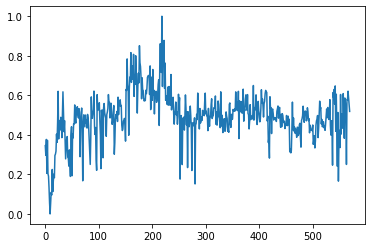

In [37]:
plt.plot(data[0,:,1])
plt.show()

In [38]:
X = data.reshape(57, -1)
# print(X)
# print(X.shape)
y = np.array(label)
y = tf.keras.utils.to_categorical(y)
# print(y)
# print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# FFT 시도
# from scipy.fft import fft
# x_fft = fft(X)
# x_fft.shape
# fig, axes = plt.subplots(57, 1, constrained_layout= True)
# fig.set_size_inches((20,400))
# for i in range(57):
#     axes[i].plot(x_fft[i])

In [39]:
nb_classes = 8
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(nb_classes, activation = 'softmax'),
 ])

# model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9),
#               loss='mse',
#               metrics=['accuracy'])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=200,
                    validation_data=(X_test, y_test),
                    )

Epoch 1/200
2/2 [==============================] - 1s 149ms/step - loss: 2.2693 - accuracy: 0.1556 - val_loss: 2.0085 - val_accuracy: 0.0833
Epoch 2/200
2/2 [==============================] - 0s 36ms/step - loss: 2.0459 - accuracy: 0.2889 - val_loss: 2.6668 - val_accuracy: 0.0833
Epoch 3/200
2/2 [==============================] - 0s 26ms/step - loss: 1.9800 - accuracy: 0.3111 - val_loss: 1.8909 - val_accuracy: 0.3333
Epoch 4/200
2/2 [==============================] - 0s 48ms/step - loss: 1.6399 - accuracy: 0.4000 - val_loss: 1.5478 - val_accuracy: 0.5833
Epoch 5/200
2/2 [==============================] - 0s 51ms/step - loss: 1.3260 - accuracy: 0.5556 - val_loss: 1.4685 - val_accuracy: 0.4167
Epoch 6/200
2/2 [==============================] - 0s 44ms/step - loss: 1.5643 - accuracy: 0.4667 - val_loss: 1.3840 - val_accuracy: 0.5833
Epoch 7/200
2/2 [==============================] - 0s 46ms/step - loss: 0.9204 - accuracy: 0.7778 - val_loss: 1.3814 - val_accuracy: 0.7500
Epoch 8/200
2/2 [==

Epoch 59/200
2/2 [==============================] - 0s 40ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.4560 - val_accuracy: 0.8333
Epoch 60/200
2/2 [==============================] - 0s 47ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.4665 - val_accuracy: 0.8333
Epoch 61/200
2/2 [==============================] - 0s 40ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.4746 - val_accuracy: 0.8333
Epoch 62/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.4714 - val_accuracy: 0.8333
Epoch 63/200
2/2 [==============================] - 0s 49ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.4630 - val_accuracy: 0.8333
Epoch 64/200
2/2 [==============================] - 0s 49ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4558 - val_accuracy: 0.8333
Epoch 65/200
2/2 [==============================] - 0s 49ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4463 - val_accuracy: 0.9167
Epoch 66/200


2/2 [==============================] - 0s 45ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.3916 - val_accuracy: 0.9167
Epoch 117/200
2/2 [==============================] - 0s 38ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3732 - val_accuracy: 0.9167
Epoch 118/200
2/2 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.00 - 0s 42ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3688 - val_accuracy: 0.9167
Epoch 119/200
2/2 [==============================] - 0s 47ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.4230 - val_accuracy: 0.9167
Epoch 120/200
2/2 [==============================] - 0s 46ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.5109 - val_accuracy: 0.8333
Epoch 121/200
2/2 [==============================] - 0s 40ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.4959 - val_accuracy: 0.9167
Epoch 122/200
2/2 [==============================] - 0s 42ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4435 -

Epoch 173/200
2/2 [==============================] - 0s 24ms/step - loss: 1.2810e-04 - accuracy: 1.0000 - val_loss: 0.4090 - val_accuracy: 0.9167
Epoch 174/200
2/2 [==============================] - 0s 32ms/step - loss: 2.3791e-04 - accuracy: 1.0000 - val_loss: 0.4270 - val_accuracy: 0.8333
Epoch 175/200
2/2 [==============================] - 0s 41ms/step - loss: 1.2445e-04 - accuracy: 1.0000 - val_loss: 0.4422 - val_accuracy: 0.8333
Epoch 176/200
2/2 [==============================] - 0s 55ms/step - loss: 1.5724e-04 - accuracy: 1.0000 - val_loss: 0.4539 - val_accuracy: 0.8333
Epoch 177/200
2/2 [==============================] - 0s 44ms/step - loss: 2.3761e-04 - accuracy: 1.0000 - val_loss: 0.4623 - val_accuracy: 0.8333
Epoch 178/200
2/2 [==============================] - 0s 32ms/step - loss: 4.6779e-04 - accuracy: 1.0000 - val_loss: 0.4681 - val_accuracy: 0.8333
Epoch 179/200
2/2 [==============================] - 0s 34ms/step - loss: 1.0602e-04 - accuracy: 1.0000 - val_loss: 0.4726 -

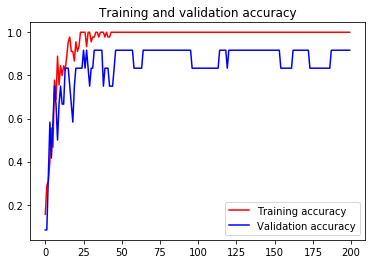

<Figure size 432x288 with 0 Axes>

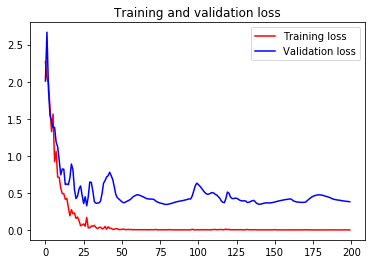

<Figure size 432x288 with 0 Axes>

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [11]:
y_train

array([[0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 

In [12]:
y_test.shape

(12, 8)

In [13]:
y

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 